In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean
import gsw

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

### Load files from monthly averages

### Calculate Salinity and Temperature at 0m

In [3]:

#years, months, data
monthly_array_0sal_slice = np.zeros([5,12,200,150])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(250,450), 'x': slice(50,200)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015,2020), ['vosaline']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015,2016,2017,2018,2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_0sal_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [4]:
monthly_array_0sal_slice[monthly_array_0sal_slice == 0 ] = np.nan
monthly_array_0sal_slicemean = \
np.nanmean(np.nanmean(monthly_array_0sal_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_0sal_slicemean))

(5, 12)


In [5]:
#years, months, data
monthly_array_0temp_slice = np.zeros([5,12,200,150])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(250,450), 'x': slice(50,200)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015,2020), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015,2016,2017,2018,2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_0temp_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [6]:
monthly_array_0temp_slice[monthly_array_0temp_slice == 0 ] = np.nan
monthly_array_0temp_slicemean = \
np.nanmean(np.nanmean(monthly_array_0temp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_0temp_slicemean))

(5, 12)


In [7]:
SurfaceDens=gsw.rho(monthly_array_0sal_slicemean,monthly_array_0temp_slicemean,0)

### Calculate Salinity and Temperature at 10 m

In [8]:

#years, months, data
monthly_array_10sal_slice = np.zeros([5,12,200,150])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(250,450), 'x': slice(50,200)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015,2020), ['vosaline']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015,2016,2017,2018,2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=10, **slc).values
            q2 = q[0,:,:]
            monthly_array_10sal_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=10, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [9]:
monthly_array_10sal_slice[monthly_array_10sal_slice == 0 ] = np.nan
monthly_array_10sal_slicemean = \
np.nanmean(np.nanmean(monthly_array_10sal_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_10sal_slicemean))

(5, 12)


In [10]:
#years, months, data
monthly_array_10temp_slice = np.zeros([5,12,200,150])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(250,450), 'x': slice(50,200)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015,2020), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015,2016,2017,2018,2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=10, **slc).values
            q2 = q[0,:,:]
            monthly_array_10temp_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=10, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [11]:
monthly_array_10temp_slice[monthly_array_10temp_slice == 0 ] = np.nan
monthly_array_10temp_slicemean = \
np.nanmean(np.nanmean(monthly_array_10temp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_10temp_slicemean))

(5, 12)


In [12]:
Dens_10m=gsw.rho(monthly_array_10sal_slicemean,monthly_array_10temp_slicemean,20)

In [13]:
Density_Diff_10=Dens_10m-SurfaceDens

In [14]:
Density_Diff_10

array([[0.47993006, 0.47731702, 0.52077757, 0.42636477, 0.48169554,
        0.5569727 , 0.5729544 , 0.57241856, 0.42394439, 0.42839039,
        0.39941174, 0.39426853],
       [0.42494358, 0.47592043, 0.37794439, 0.43019136, 0.47820564,
        0.49137713, 0.50981081, 0.60988642, 0.51234493, 0.3795012 ,
        0.41804898, 0.38780903],
       [0.42045948, 0.40993138, 0.4436312 , 0.65860964, 0.51636527,
        0.5166165 , 0.52515964, 0.64502371, 0.57232651, 0.45694907,
        0.42815445, 0.44083511],
       [0.4404398 , 0.41556527, 0.4362106 , 0.4395329 , 0.48574476,
        0.54846214, 0.68106871, 0.6174985 , 0.47526965, 0.46800247,
        0.43131108, 0.38514793],
       [0.41121091, 0.36934   , 0.44087862, 0.41325407, 0.5715466 ,
        0.51544874, 0.56304694, 0.5917997 , 0.45501458, 0.41563972,
        0.51261241, 0.49237641]])

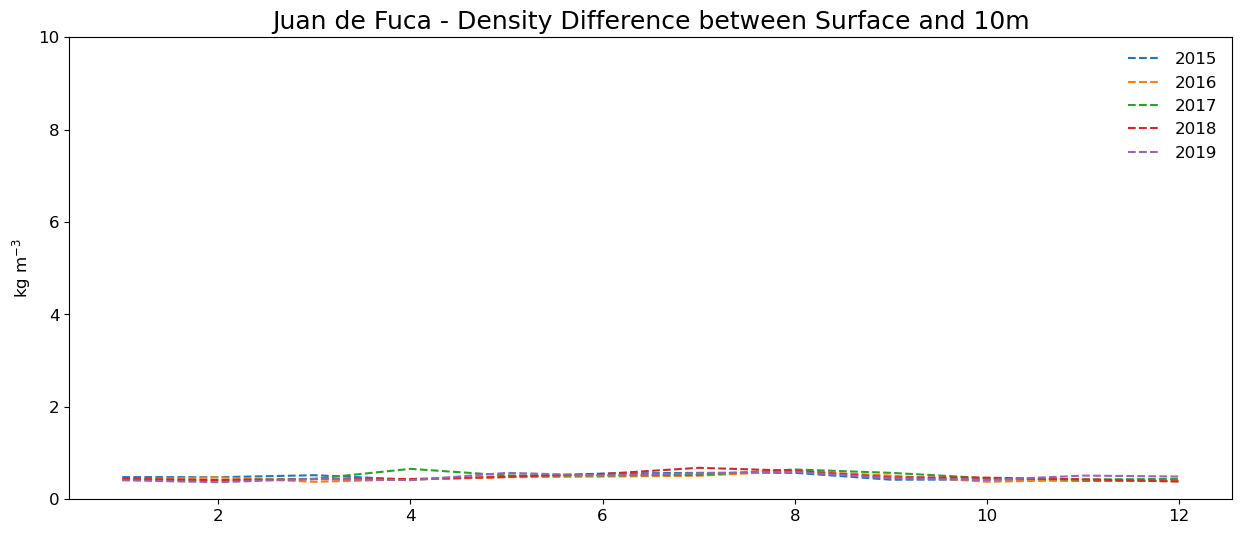

In [35]:
#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

   
for i in range(0,5):
    ax.plot(np.arange(1,13), Density_Diff_10[i,:],linestyle='--',label=2015+i)
    ax.set_title('Juan de Fuca - Density Difference between Surface and 10m',fontsize=18)
    ax.legend(frameon=False,bbox_to_anchor=(1, 1))
    ax.set_ylim(0,10)
    ax.set_ylabel('kg m$^{-3}$')
    #ax.invert_yaxis()

### Calculate Salinity and Temperature at 25 m

In [17]:

#years, months, data
monthly_array_100sal_slice = np.zeros([5,12,200,150])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(250,450), 'x': slice(50,200)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015,2020), ['vosaline']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015,2016,2017,2018,2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=27, **slc).values
            q2 = q[0,:,:]
            monthly_array_100sal_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=27, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [18]:
monthly_array_100sal_slice[monthly_array_100sal_slice == 0 ] = np.nan
monthly_array_100sal_slicemean = \
np.nanmean(np.nanmean(monthly_array_100sal_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_100sal_slicemean))

(5, 12)


In [19]:
#years, months, data
monthly_array_100temp_slice = np.zeros([5,12,200,150])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(250,450), 'x': slice(50,200)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015, 2020), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015, 2016, 2017, 2018, 2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=27, **slc).values
            q2 = q[0,:,:]
            monthly_array_100temp_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=27, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [20]:
monthly_array_100temp_slice[monthly_array_100temp_slice == 0 ] = np.nan
monthly_array_100temp_slicemean = \
np.nanmean(np.nanmean(monthly_array_100temp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_100temp_slicemean))

(5, 12)


In [21]:
Dens_100m=gsw.rho(monthly_array_100sal_slicemean,monthly_array_100temp_slicemean,100)

In [22]:
Density_Diff_100=Dens_100m-SurfaceDens

In [23]:
Density_Diff_100

array([[2.24429181, 2.30511577, 3.05634384, 3.15569581, 3.45825765,
        4.00744058, 3.92354297, 3.60575864, 2.85801378, 2.60945134,
        2.27114847, 1.63638144],
       [1.8610585 , 2.04879424, 1.90895244, 2.83778389, 3.61449488,
        3.51360332, 3.66894438, 3.98166539, 3.13701412, 2.30355848,
        1.76572763, 2.07620447],
       [1.98439289, 1.86553346, 2.23770679, 2.83873705, 3.18970733,
        3.55237153, 3.94381663, 3.881775  , 3.34217089, 2.62591425,
        1.99150591, 2.20935801],
       [1.9048367 , 2.23287057, 2.40513772, 2.51112355, 3.12201275,
        3.63436164, 4.02844222, 3.57998572, 2.95095488, 2.756547  ,
        2.23283951, 1.53593081],
       [1.66717968, 1.92400353, 2.22748731, 2.42700201, 3.24363552,
        3.40273985, 3.28329361, 3.34562556, 2.81205659, 2.56815938,
        2.45691444, 1.94110242]])

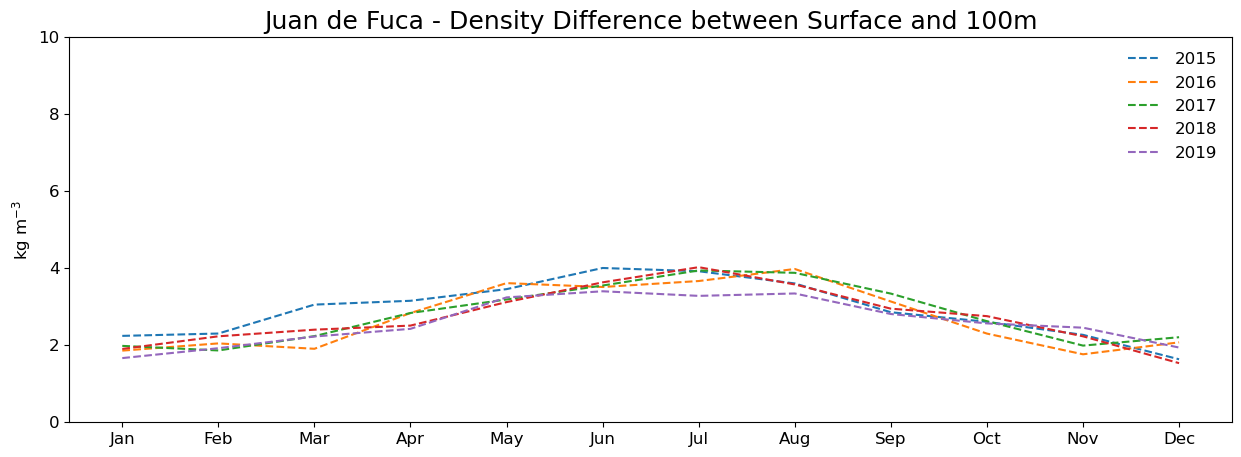

In [34]:
#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

for i in range(0,5):
    ax.plot(xticks, Density_Diff_100[i,:],linestyle='--',label=2015+i)
    ax.set_title('Juan de Fuca - Density Difference between Surface and 100m',fontsize=18)
    ax.legend(frameon=False,bbox_to_anchor=(1, 1))
    ax.set_ylim(0,10)
    ax.set_ylabel('kg m$^{-3}$')
    #ax.invert_yaxis()

In [31]:
Density_Diff_100[:,:].mean()

2.761774609403805

In [32]:
Density_Diff_100[:,5].mean()

3.6221033830645637

In [33]:
Density_Diff_100[:,6].mean()

3.7696079620990077